## 1.0 - Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as rc

## 2.0 - Tratamento dos Dados

### 2.1 - Extração dos Dados

In [2]:
df = pd.read_csv('campeonato-brasileiro-full.csv')
df.head()

,Horário,Dia,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate


### 2.2 - Padronizando os dados ###
Alguns dados não estão seguindo o mesmo padrão, então será necessário padronizar o nome de cada time, com apenas a primeira letra em maiúsculo. 

In [3]:
print(df['Clube 1'].unique())

['Fluminense' 'Vasco' 'Vitória' 'Botafogo-RJ' 'Juventude' 'Guarani'
 'Cruzeiro' 'América-MG' 'Goiás' 'Coritiba' 'Bahia' 'Flamengo' 'Gama'
 'Internacional' 'Ponte Preta' 'Santos' 'Palmeiras' 'Athlético-PR'
 'Corinthians' 'Atlético-MG' 'Portuguesa' 'Grêmio' 'São Paulo'
 'Santa Cruz' 'Sport' 'INTERNACIONAL' 'Paraná' 'REMO' 'São Caetano'
 'MALUTROM' 'PALMEIRAS' 'BAHIA' 'CRUZEIRO' 'PONTE PRETA' 'FLUMINENSE'
 'SPORT' 'VASCO' 'Botafogo-SP' 'Figueirense' 'Paysandu' 'SANTOS'
 'CORINTHIANS' 'JUVENTUDE' 'Fortaleza' 'Criciúma' 'Brasiliense'
 'América-RN' 'Náutico' 'Ipatinga' 'Avaí' 'Santo André' 'Barueri'
 'FLAMENGO' 'Atlético-GO' 'Ceará' 'Grêmio Prudente' 'Chapecoense'
 'Joinville' 'Botafogo-rj' 'CSA']


In [4]:
print(df['Clube 2'].unique())

['Bahia' 'Sport' 'Palmeiras' 'Atlético-MG' 'Flamengo' 'Santa Cruz'
 'Athlético-PR' 'Gama' 'Corinthians' 'Grêmio' 'Fluminense' 'Goiás'
 'América-MG' 'Vitória' 'Botafogo-RJ' 'Santos' 'Cruzeiro' 'Ponte Preta'
 'Guarani' 'São Paulo' 'Portuguesa' 'Coritiba' 'Internacional' 'Juventude'
 'Vasco' 'SPORT' 'FLUMINENSE' 'CRUZEIRO' 'PONTE PRETA' 'VASCO'
 'INTERNACIONAL' 'Paraná' 'MALUTROM' 'São Caetano' 'REMO' 'BAHIA'
 'PALMEIRAS' 'Botafogo-SP' 'portuguesa' 'Paysandu' 'Figueirense'
 'JUVENTUDE' 'CORINTHIANS' 'SANTOS' 'Fortaleza' 'Criciúma' 'PAYSANDU'
 'Brasiliense' 'Náutico' 'América-RN' 'Ipatinga' 'Barueri' 'Avaí'
 'Santo André' 'Grêmio Prudente' 'Atlético-GO' 'Ceará' 'GUARANI'
 'Chapecoense' 'Joinville' 'Botafogo-rj' 'CSA']


In [5]:
df = df.replace(['INTERNACIONAL','REMO','MALUTROM','PALMEIRAS','BAHIA','CRUZEIRO','PONTE PRETA',
                 'FLUMINENSE','SPORT','VASCO','SANTOS','CORINTHIANS','JUVENTUDE','FLAMENGO','GUARANI','PAYSANDU','Botafogo-RJ'],
                ['Internacional','Remo','Malutrom','Palmeiras','Bahia','Cruzeiro','Ponte Preta',
                 'Fluminense','Sport','Vasco','Santos','Corinthians','Juventude','Flamengo','Guarani','Paysandu','Botafogo-rj'])

### 2.3 - Reestruturação das tabelas ###
A tabela possui alguns dados desnecessários, por conta disso, será criado uma nova com as seguintes colunas:
* Ano
* Time Mandante
* Time Visitante
* Gols Mandante
* Gols Visitante
* Vencedor

### 2.4 - Filtrando os dados ###
Como a análise será apenas dos <b> dez primeiros anos dos pontos corridos</b>, será necessário retirar os dados antes de 2003(Ano que iniciou os pontos corridos) e depois de 2012(Pois formou os dez anos).


<b> Criando coluna Ano </b>

In [6]:
df['Data'] = pd.to_datetime(df['Data'])
df['Ano'] = df['Data'].dt.year

<b> Retirando os dados antes de 2003 e depois de 2012. </b>

In [7]:
df = df.drop(df[df.Ano < 2003].index)
df = df.drop(df[df.Ano > 2012].index)

<b> Retirando os dados que não serão utilizados </b>

df = df.drop(['Horário', 'Dia','Rodada','Arena','Clube 1 Estado','Clube 2 Estado','Estado Clube Vencedor'], axis = 1)

<b> Renomeando as colunas </b>

In [8]:
df = df.rename(columns={"Clube 1":"Mandante","Clube 2":"Visitante","Clube 1 Gols":"Mandante Gols",
                        "Clube 2 Gols":"Visitante Gols"})

<b> Trocando o "-" por "Empate"</b>

In [9]:
df = df.replace('-','Empate')

<b> Criando uma nova Dataframe </b>

In [10]:
dados = df.copy()

<b> Retirar os dados referente as partida que o Fluminense não jogou </b>

In [11]:
df = df.drop(df[(df['Mandante'] != 'Fluminense') & (df['Visitante'] != 'Fluminense')].index)

## 3.0 - Visualizando os novos dados

### 3.1 - Nova tabela

In [12]:
df.head()

,Horário,Dia,Data,Mandante,Visitante,Vencedor,Rodada,Arena,Mandante Gols,Visitante Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor,Ano
1064,16h00,Domingo,2003-03-30,Criciúma,Fluminense,Criciúma,1ª Rodada,Heriberto Hulse,2,0,SC,RJ,SC,2003
1065,16h00,Sábado,2003-04-05,Fluminense,Fortaleza,Empate,2ª Rodada,Maracanã,1,1,RJ,CE,Empate,2003
1086,18h00,Domingo,2003-04-13,Flamengo,Fluminense,Flamengo,3ª Rodada,Maracanã,4,1,RJ,RJ,RJ,2003
1098,20h30,Quinta-feira,2003-04-17,Fluminense,Internacional,Fluminense,4ª Rodada,Maracanã,3,1,RJ,RS,RJ,2003
1105,18h00,Domingo,2003-04-20,Fluminense,Paraná,Empate,5ª Rodada,Maracanã,0,0,RJ,PR,Empate,2003


### 3.2 - Jogos por ano

In [13]:
jogos = df.groupby('Ano')['Ano'].count()
jogos = pd.DataFrame(jogos)
jogos.columns = ['Jogos']
jogos.reset_index(level=0, inplace=True)
print(jogos)

    Ano  Jogos
0  2003     46
1  2004     46
2  2005     42
3  2006     38
4  2007     38
5  2008     38
6  2009     38
7  2010     38
8  2011     38
9  2012     38


## 4.0 - KPI: Gols marcados

### 4.1 - Partidas como mandante

<b> Dataframe: Partidas como mandante </b>

In [14]:
mandante = df.copy()
mandante = mandante.drop(mandante[mandante['Mandante'] != 'Fluminense'].index)

<b> Dataframe: Partidas como mandante por ano </b>

In [15]:
jogos_mandante = mandante.groupby('Ano')['Ano'].count()
jogos_mandante = pd.DataFrame(jogos_mandante)
jogos_mandante.columns = ['Partidas mandante']
jogos_mandante.reset_index(level=0, inplace=True)

<b> Dataframe: Número de gols como mandante por ano </b>

In [16]:
gols_mandante = mandante.groupby('Ano')['Mandante Gols'].sum()
gols_mandante = pd.DataFrame(gols_mandante)
gols_mandante.columns = ['Mandante Gols']
gols_mandante.reset_index(level=0, inplace=True)

<b> Dataframe: Gols e Partidas como mandante por ano </b>

In [17]:
gp_mandante = jogos_mandante.merge(gols_mandante, how='left', on='Ano')

<b> Nova Coluna: Média de gols como mandante por partida</b>

In [18]:
gp_mandante['GP Mandante'] = round(gp_mandante['Mandante Gols']/gp_mandante['Partidas mandante'],2)


### 4.2 - Partidas como visitante

<b> Dataframe: Partidas como visitante </b>

In [19]:
visitante = df.copy()
visitante = visitante.drop(visitante[visitante['Visitante'] != 'Fluminense'].index)

<b> Dataframe: Partidas como visitante por ano </b>

In [20]:
jogos_visitante = visitante.groupby('Ano')['Ano'].count()
jogos_visitante = pd.DataFrame(jogos_visitante)
jogos_visitante.columns = ['Partidas visitante']
jogos_visitante.reset_index(level=0, inplace=True)

<b> Dataframe: Gols como visitante por ano </b>

In [21]:
gols_visitante = visitante.groupby('Ano')['Visitante Gols'].sum()
gols_visitante = pd.DataFrame(gols_visitante)
gols_visitante.columns = ['Visitante Gols']
gols_visitante.reset_index(level=0, inplace=True)

<b> Dataframe: Gols e Partidas como visitante por ano </b>

In [22]:
gp_visitante = jogos_visitante.merge(gols_visitante, how='left', on='Ano')

<b> Nova Coluna: Média de gols como visitante por partida</b>

In [23]:
gp_visitante['GP Visitante'] = round(gp_visitante['Visitante Gols']/gp_visitante['Partidas visitante'],2)

<b> Dataframe: Média de total de gols por partida </b>

In [24]:
gp_geral = gp_mandante.merge(gp_visitante, how='left', on='Ano')
gp_geral['Partidas'] = gp_geral['Partidas mandante'] + gp_geral['Partidas visitante']
gp_geral['Gols'] = gp_geral['Mandante Gols'] + gp_geral['Visitante Gols']
gp_geral['GP Geral'] = round(gp_geral['Gols']/gp_geral['Partidas'],2)

### 4.3 - Visualização

<b> Gols por Ano </b>

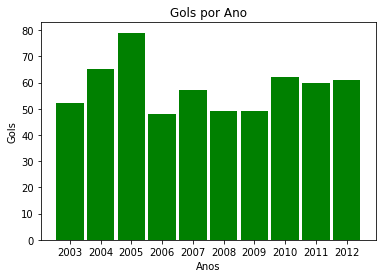

In [25]:
r = [0,1,2,3,4,5,6,7,8,9]

nomes = ('2003','2004','2005','2006','2007','2008','2009','2010','2011','2012')

coluna1 = gp_geral['Gols']

# gráfico
barWidth = 0.9
# Criando a barra de gols marcados
plt.bar(r, coluna1, color='green', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Gols")
plt.title("Gols por Ano")

# Tamanho do gráfico
plt.rcParams["figure.figsize"] = [12,6]
 
# Visualizar o gráfico
plt.show()

<b> Gols marcados por partida </b>

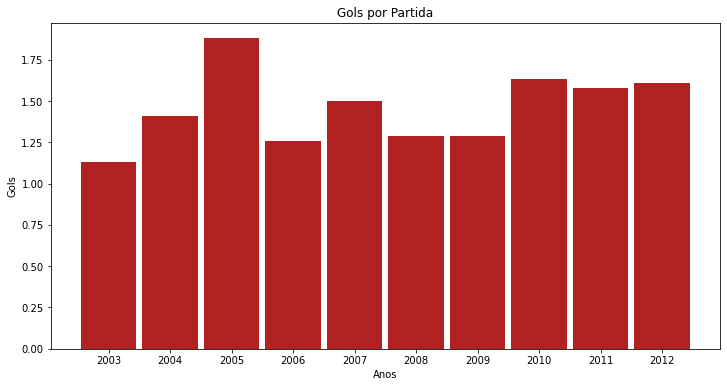

In [26]:
coluna1 = gp_geral['GP Geral']

# gráfico
barWidth = 0.9
# Criando a barra de gols marcados por partida
plt.bar(r, coluna1, color='firebrick', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Gols")
plt.title("Gols por Partida")

# Tamanho do gráfico
plt.rcParams["figure.figsize"] = [12,6]
 
# Visualizar o gráfico
plt.show()


<b> Gols Em Casa x Fora de Casa </b>

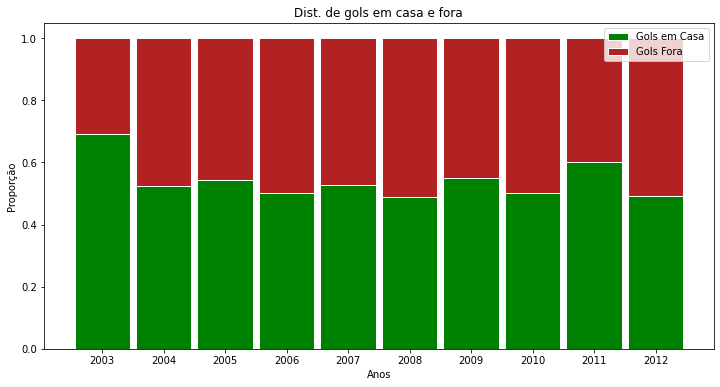

In [27]:
coluna1 = gp_geral['Mandante Gols']/gp_geral['Gols']
coluna2 = gp_geral['Visitante Gols']/gp_geral['Gols']

# gráfico
barWidth = 0.9
# Criando a barra de gols em casa
plt.bar(r, coluna1, color='green', edgecolor='white', width=barWidth,label='Gols em Casa')
# Criando a barra de gols fora de casa
plt.bar(r, coluna2, bottom=coluna1, color='firebrick', edgecolor='white', width=barWidth,label='Gols Fora')

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Proporção")
plt.title("Dist. de gols em casa e fora")
 
plt.rcParams["figure.figsize"] = [12,6]
    
# Visualizar o gráfico
plt.legend()
plt.show()

### 4.4 - Médias

In [28]:
# Gols por jogo
gols = gp_geral['Gols'].sum()
partidas =  gp_geral['Partidas'].sum()
gols_partida = gols/partidas
print("O Fluminense teve uma média de "+str(round(gols_partida,1))+ " gols por partida")

# Gols por jogo em casa
gols_casa = gp_geral['Mandante Gols'].sum()
partidas_casa =  gp_geral['Partidas mandante'].sum()
gols_partida_casa = gols_casa/partidas_casa
print("Em casa, o Fluminense teve uma média de "+str(round(gols_partida_casa,1))+ " gols por partida")

# Gols por jogo fora de casa
gols_fora = gp_geral['Visitante Gols'].sum()
partidas_fora =  gp_geral['Partidas visitante'].sum()
gols_partida_fora = gols_fora/partidas_fora
print("Fora de casa, o Fluminense teve uma média de "+str(round(gols_partida_fora,1))+ " gols por partida")

O Fluminense teve uma média de 1.5 gols por partida
Em casa, o Fluminense teve uma média de 1.6 gols por partida
Fora de casa, o Fluminense teve uma média de 1.3 gols por partida


## 5.0 - KPI: Resultados

### 5.1 - Partidas como mandante

<b> Dataframes: Total de Vitórias

In [29]:
vitorias_casa=mandante.groupby('Ano')['Vencedor'].apply(lambda x: (x=='Fluminense').sum()).reset_index(name='Vitórias')

<b> Dataframes: Total de Empates

In [30]:
empates_casa=mandante.groupby('Ano')['Vencedor'].apply(lambda x: (x=='Empate').sum()).reset_index(name='Empates')

<b> Dataframes: Vitórias + Empates

In [31]:
resultado_casa = jogos_mandante.merge(vitorias_casa, how='left', on='Ano')
resultado_casa = resultado_casa.merge(empates_casa, how='left', on='Ano')

<b> Renomeando coluna </b>

In [32]:
resultado_casa = resultado_casa.rename(columns={"Partidas mandante":"Jogos"})

<b> Nova Coluna: Total de Derrotas</b>

In [33]:
resultado_casa['Derrotas']= resultado_casa['Jogos'] - resultado_casa['Vitórias']-resultado_casa['Empates']

#### Distribuição de resultados em casa

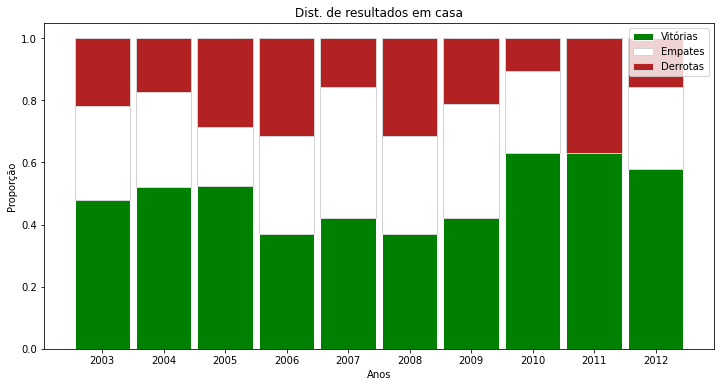

In [34]:
coluna1 = resultado_casa['Vitórias']/resultado_casa['Jogos']
coluna2 = resultado_casa['Empates']/resultado_casa['Jogos']
coluna3 = resultado_casa['Derrotas']/resultado_casa['Jogos']

# gráfico
barWidth = 0.9
# Criando a barra de vitórias
plt.bar(r, coluna1, color='green', edgecolor='white', width=barWidth,label='Vitórias')
# Criando a barra de empates
plt.bar(r, coluna2, bottom=coluna1, color='white', edgecolor='lightgray', width=barWidth,label='Empates')
# Criando a barra de derrotas
plt.bar(r, coluna3, bottom=[i+j for i,j in zip(coluna1, coluna2)], color='firebrick', edgecolor='lightgray',
        width=barWidth,label='Derrotas')

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Proporção")
plt.title("Dist. de resultados em casa")
 
# Visualizar o gráfico
plt.legend()
plt.show()

### 5.2 - Aproveitamento como mandante

In [35]:
resultado_casa['% Aprov.']= round((3*resultado_casa['Vitórias']+resultado_casa['Empates'])/(3*resultado_casa['Jogos']),2)
print(resultado_casa)

    Ano  Jogos  Vitórias  Empates  Derrotas  % Aprov.
0  2003     23        11        7         5      0.58
1  2004     23        12        7         4      0.62
2  2005     21        11        4         6      0.59
3  2006     19         7        6         6      0.47
4  2007     19         8        8         3      0.56
5  2008     19         7        6         6      0.47
6  2009     19         8        7         4      0.54
7  2010     19        12        5         2      0.72
8  2011     19        12        0         7      0.63
9  2012     19        11        5         3      0.67


#### Visualização

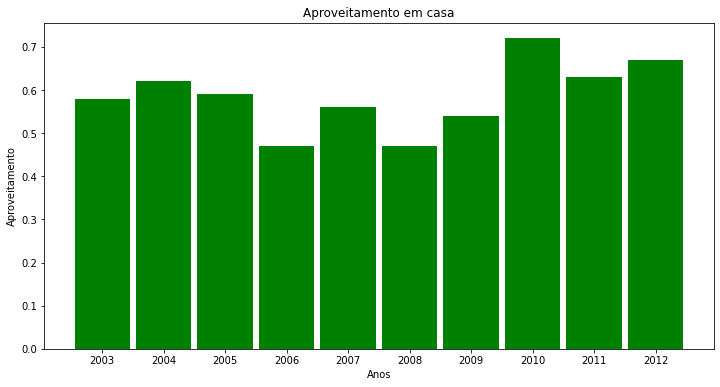

In [36]:
coluna1 = resultado_casa['% Aprov.']

# gráfico
barWidth = 0.9
# Criando a barra de aproveitamento
plt.bar(r, coluna1, color='green', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Aproveitamento")
plt.title("Aproveitamento em casa")

plt.rcParams["figure.figsize"] = [12,6]
 
# Visualizar o gráfico
plt.show()

### 5.3 - Partidas como visitante

#### Dataframes: Total de Vitórias

In [37]:
vitorias_fora=visitante.groupby('Ano')['Vencedor'].apply(lambda x: (x=='Fluminense').sum()).reset_index(name='Vitórias')

#### Dataframes: Total de Empates

In [38]:
empates_fora=visitante.groupby('Ano')['Vencedor'].apply(lambda x: (x=='Empate').sum()).reset_index(name='Empates')

#### Dataframes: Vitórias + Empates

In [39]:
resultado_fora = jogos_visitante.merge(vitorias_fora, how='left', on='Ano')
resultado_fora = resultado_fora.merge(empates_fora, how='left', on='Ano')

#### Renomeando coluna

In [40]:
resultado_fora = resultado_fora.rename(columns={"Partidas visitante":"Jogos"})

#### Dataframes: Total de Derrotas

In [41]:
resultado_fora['Derrotas']= resultado_fora['Jogos'] - resultado_fora['Vitórias']-resultado_fora['Empates']

#### Distribuição de resultados fora de casa

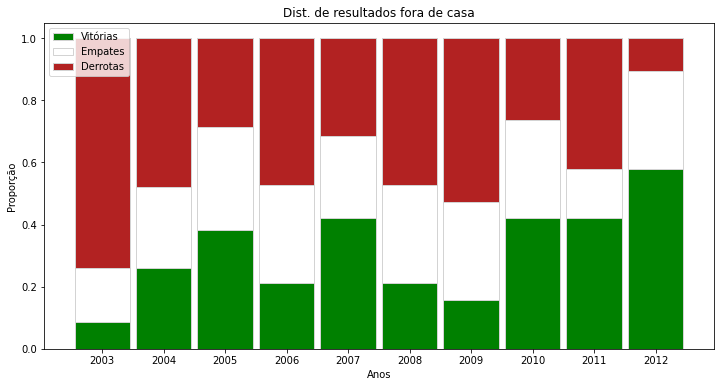

In [42]:
coluna1 = resultado_fora['Vitórias']/resultado_fora['Jogos']
coluna2 = resultado_fora['Empates']/resultado_fora['Jogos']
coluna3 = resultado_fora['Derrotas']/resultado_fora['Jogos']

# gráfico
barWidth = 0.9
# Criando a barra de vitórias
plt.bar(r, coluna1, color='green', edgecolor='lightgray', width=barWidth,label='Vitórias')
# Criando a barra de empates
plt.bar(r, coluna2, bottom=coluna1, color='white', edgecolor='lightgray', width=barWidth,label='Empates')
# Criando a barra de derrotas
plt.bar(r, coluna3, bottom=[i+j for i,j in zip(coluna1, coluna2)], color='firebrick', edgecolor='lightgray',
        width=barWidth,label='Derrotas')

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Proporção")
plt.title("Dist. de resultados fora de casa")
 
# Visualizar o gráfico
plt.legend()

### 5.4 - Aproveitamento como visitante

In [43]:
resultado_fora['% Aprov.']= round((3*resultado_fora['Vitórias']+resultado_fora['Empates'])/(3*resultado_fora['Jogos']),2)
print(resultado_fora)

    Ano  Jogos  Vitórias  Empates  Derrotas  % Aprov.
0  2003     23         2        4        17      0.14
1  2004     23         6        6        11      0.35
2  2005     21         8        7         6      0.49
3  2006     19         4        6         9      0.32
4  2007     19         8        5         6      0.51
5  2008     19         4        6         9      0.32
6  2009     19         3        6        10      0.26
7  2010     19         8        6         5      0.53
8  2011     19         8        3         8      0.47
9  2012     19        11        6         2      0.68


#### Visualização

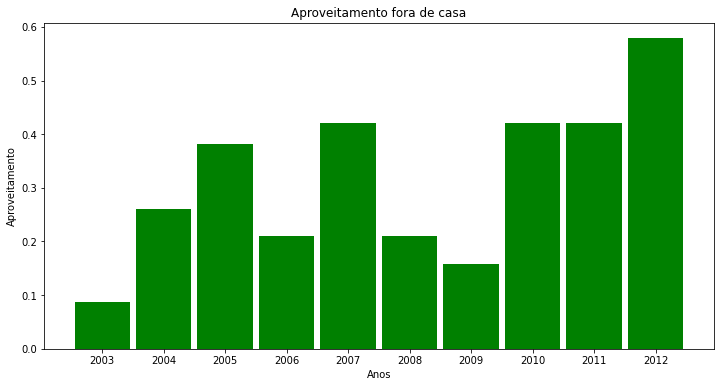

In [44]:
# gráfico
barWidth = 0.9
# Criando a barra de aproveitamento
plt.bar(r, coluna1, color='green', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Aproveitamento")
plt.title("Aproveitamento fora de casa")

plt.rcParams["figure.figsize"] = [12,6]
 
# Visualizar o gráfico
plt.show()

### 5.5 - Total de Partidas

#### Dataframes: Resultado como Mandante + Resultados como Visitante

In [45]:
# Deletar colunas de aproveitamento
resultado_casa = resultado_casa.drop(['% Aprov.'], axis = 1)
resultado_fora = resultado_fora.drop(['% Aprov.'], axis = 1)

# Deletar coluna repetida
resultado_casa = resultado_casa.drop(['Jogos'], axis = 1)
resultado_fora = resultado_fora.drop(['Jogos'], axis = 1)

# Renomear colunas
resultado_casa = resultado_casa.rename(columns={"Vitórias":"Vit casa","Empates":"Emp casa","Derrotas":"Der casa"})
resultado_fora = resultado_fora.rename(columns={"Vitórias":"Vit fora","Empates":"Emp fora","Derrotas":"Der fora"})

# Juntar dataframes
resultado = jogos.merge(resultado_casa, how='left', on='Ano')
resultado = resultado.merge(resultado_fora, how='left', on='Ano')

# Coluna de Pontos
resultado['Pts'] = 3*(resultado['Vit casa']+resultado['Vit fora'])+resultado['Emp casa']+resultado['Emp fora']

# Coluna com a proporção de pontos conquistados em casa
resultado['% Pts casa']= round((3*resultado['Vit casa']+resultado['Emp casa'])/resultado['Pts'],2)

# Coluna com a proporção de pontos conquistados fora de casa
resultado['% Pts fora']= round((3*resultado['Vit fora']+resultado['Emp fora'])/resultado['Pts'],2)

resultado['Vit'] = resultado['Vit casa'] + resultado['Vit fora']
resultado['Der'] = resultado['Der casa'] + resultado['Der fora']
resultado['Emp'] = resultado['Emp casa'] + resultado['Emp fora']

#### Distribuição de resultados

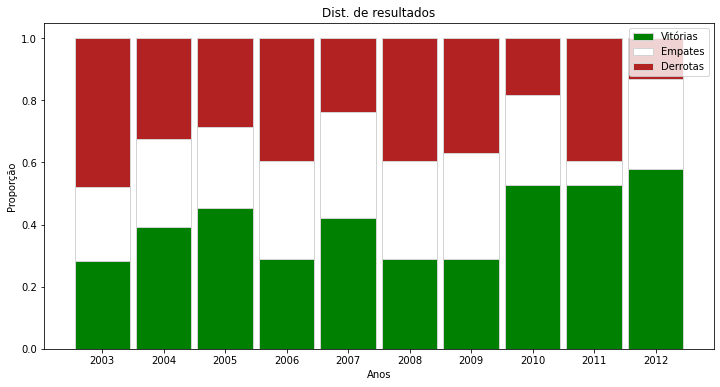

In [46]:
coluna1 = resultado['Vit']/resultado['Jogos']
coluna2 = resultado['Emp']/resultado['Jogos']
coluna3 = resultado['Der']/resultado['Jogos']

# gráfico
barWidth = 0.9
# Criando a barra de vitórias
plt.bar(r, coluna1, color='green', edgecolor='lightgray', width=barWidth,label='Vitórias')
# Criando a barra de empates
plt.bar(r, coluna2, bottom=coluna1, color='white', edgecolor='lightgray', width=barWidth,label='Empates')
# Criando a barra de derrotas
plt.bar(r, coluna3, bottom=[i+j for i,j in zip(coluna1, coluna2)], color='firebrick', edgecolor='lightgray',
        width=barWidth,label='Derrotas')

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Proporção")
plt.title("Dist. de resultados")
 
# Visualizar o gráfico
plt.legend()
plt.show()

#### Aproveitamento de Pontos

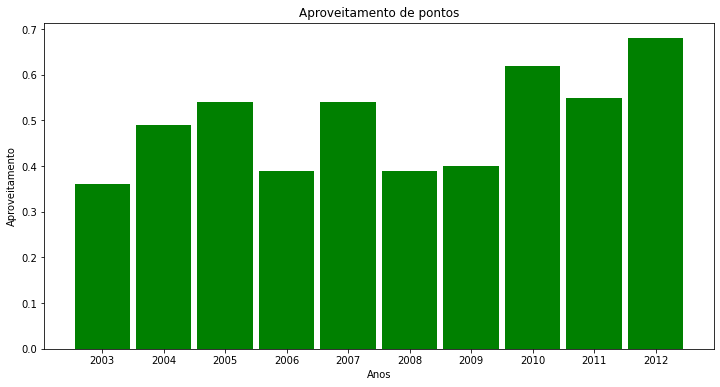

In [47]:
resultado['% Aprov.']= round((3*resultado['Vit']+resultado['Emp'])/(3*resultado['Jogos']),2)

coluna1 = resultado['% Aprov.']

# gráfico
barWidth = 0.9
# Criando a barra de aproveitamento
plt.bar(r, coluna1, color='green', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Aproveitamento")
plt.title("Aproveitamento de pontos")

plt.rcParams["figure.figsize"] = [12,6]
 
# Visualizar o gráfico
plt.show()

#### Evolução de pontos conquistados

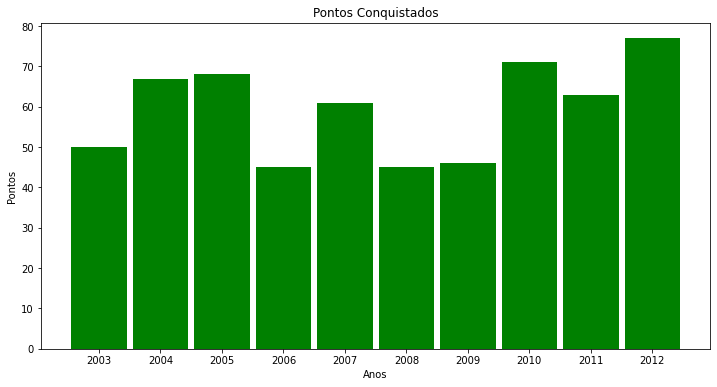

In [49]:
coluna1 = resultado['Pts']

# gráfico
barWidth = 0.9
# Criando a barra de pontos conquistados
plt.bar(r, coluna1, color='green', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Pontos")
plt.title("Pontos Conquistados")

plt.rcParams["figure.figsize"] = [12,6]
 
# Visualizar o gráfico
plt.show()

#### Distribuição de pontos conquistados em cada e fora de casa

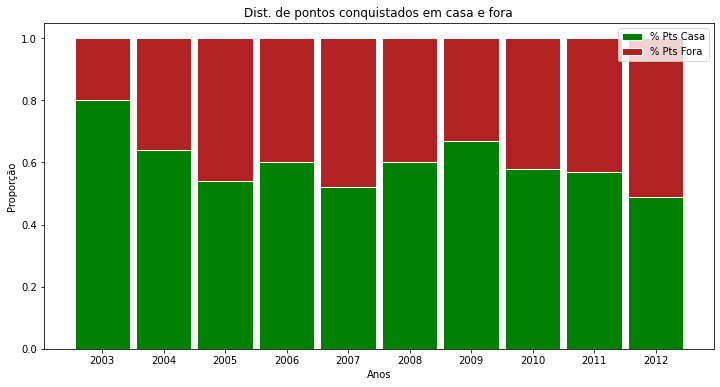

In [48]:
coluna1 = resultado['% Pts casa']
coluna2 = resultado['% Pts fora']

# gráfico
barWidth = 0.9
# Criando a barra de pontos conquistados em casa
plt.bar(r, coluna1, color='green', edgecolor='white', width=barWidth,label='% Pts Casa')
# Criando a barra de pontos conquistados fora de casa
plt.bar(r, coluna2, bottom=coluna1, color='firebrick', edgecolor='white', width=barWidth,label='% Pts Fora')

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Proporção")
plt.title("Dist. de pontos conquistados em casa e fora")
 
plt.rcParams["figure.figsize"] = [12,6]
    
# Visualizar o gráfico
plt.legend()
plt.show()

## 6.0 - KPI: Confrontos

### 6.1 - Times que mais venceram o Fluminense

#### Vitórias por adversário

In [50]:
adversarios_vit = df.groupby('Vencedor')['Vencedor'].count()
adversarios_vit = pd.DataFrame(adversarios_vit)
adversarios_vit.columns = ['Vitórias']
adversarios_vit.reset_index(level=0, inplace=True)

#### Remover dados referente aos jogos que o Fluminense ganhou ou empatou

In [52]:
adversarios_vit = adversarios_vit.drop(adversarios_vit[(adversarios_vit['Vencedor'] == 'Fluminense')].index)
adversarios_vit = adversarios_vit.drop(adversarios_vit[(adversarios_vit['Vencedor'] == 'Empate')].index)

#### Classificar em Ordem Decrescente

In [53]:
adversarios_vit.sort_values(by=['Vitórias'], inplace=True, ascending=False)

#### Visualização

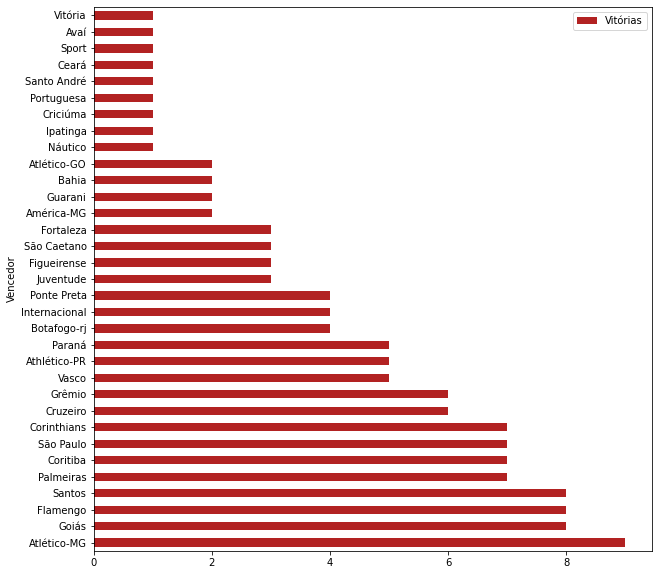

In [54]:
ax = adversarios_vit.plot.barh(x='Vencedor', y='Vitórias',color ='firebrick',figsize=(10,10))

### 6.2 - Times que mais fizeram gol no Fluminense

#### Adversários que fizeram gols como visitante

In [55]:
gols_adversarios_casa = mandante.groupby('Visitante')['Visitante Gols'].sum()
gols_adversarios_casa = pd.DataFrame(gols_adversarios_casa)
gols_adversarios_casa.columns = ['Gols Casa']
gols_adversarios_casa.reset_index(level=0, inplace=True)
gols_adversarios_casa.columns = ['Time','Gols Casa']

#### Adversários que fizeram gols como mandante

In [56]:
gols_adversarios_fora = visitante.groupby('Mandante')['Mandante Gols'].sum()
gols_adversarios_fora = pd.DataFrame(gols_adversarios_fora)
gols_adversarios_fora.columns = ['Gols Fora']
gols_adversarios_fora.reset_index(level=0, inplace=True)
gols_adversarios_fora.columns = ['Time','Gols Fora']


#### Total de gols

In [57]:
gols_adversarios = gols_adversarios_casa.merge(gols_adversarios_fora, how='left', on='Time')

In [58]:
gols_adversarios['Gols'] = gols_adversarios['Gols Casa'] + gols_adversarios['Gols Fora']

#### Classificando em Ordem Decrescente

In [59]:
gols_adversarios.sort_values(by=['Gols'], inplace=True, ascending=False)

#### Visualização

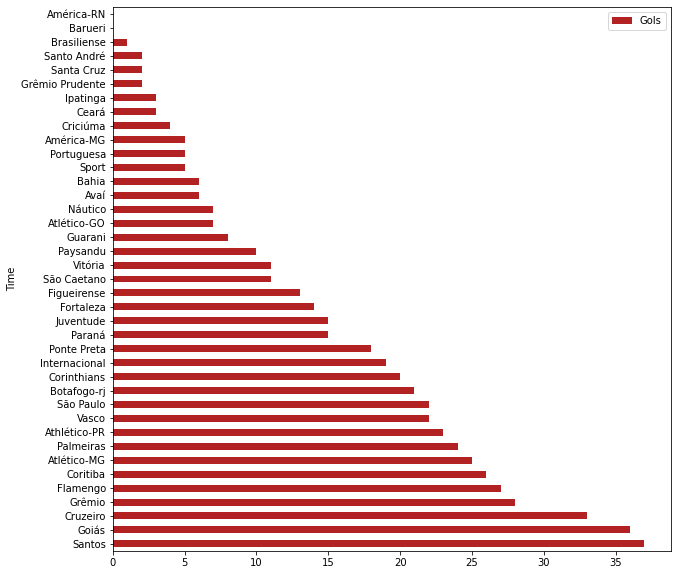

In [60]:
ax = gols_adversarios.plot.barh(x='Time', y='Gols',color ='firebrick',figsize=(10,10))

### 6.3 - Times que mais perderam para o Fluminense

#### Criando um novo Dataframe

In [61]:
perdedores = df.copy()

#### Criando a coluna de perdedores

In [62]:
condicoes = [(perdedores['Mandante'] == perdedores['Vencedor']),(perdedores['Visitante'] == perdedores['Vencedor'])]
valores = [perdedores['Visitante'], perdedores['Mandante']]
perdedores['Perdedor'] = np.select(condicoes, valores, default='Empate')

#### Contar o número de vitórias do Fluminense sobre cada adversário

In [63]:
fluminense_vit = perdedores.groupby('Perdedor')['Perdedor'].count()
fluminense_vit = pd.DataFrame(fluminense_vit)
fluminense_vit.columns = ['Vitórias']
fluminense_vit.reset_index(level=0, inplace=True)

#### Remover dados referente as derrotas e empates do Fluminense

In [64]:
fluminense_vit = fluminense_vit.drop(fluminense_vit[(fluminense_vit['Perdedor'] == 'Fluminense')].index)
fluminense_vit = fluminense_vit.drop(fluminense_vit[(fluminense_vit['Perdedor'] == 'Empate')].index)

#### Classificar em Ordem Decrescente

In [65]:
fluminense_vit.sort_values(by=['Vitórias'], inplace=True, ascending=False)

#### Visualização

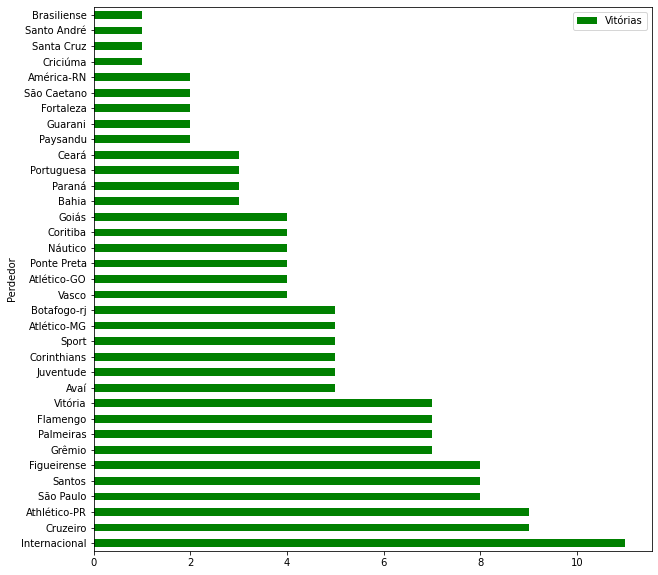

In [66]:
ax = fluminense_vit.plot.barh(x='Perdedor', y='Vitórias',color ='green',figsize=(10,10))

### 6.4 - Times que mais levaram gol do Fluminense

#### Adversários que tomaram gol como visitante

In [68]:
gols_fluminense_casa = mandante.groupby('Visitante')['Mandante Gols'].sum()
gols_fluminense_casa = pd.DataFrame(gols_fluminense_casa)
gols_fluminense_casa.columns = ['Gols Fluminense Casa']
gols_fluminense_casa.reset_index(level=0, inplace=True)
gols_fluminense_casa.columns = ['Time','Gols Fluminense Casa']

#### Adversários que tomaram gol como mandante

In [70]:
gols_fluminense_fora = visitante.groupby('Mandante')['Visitante Gols'].sum()
gols_fluminense_fora = pd.DataFrame(gols_fluminense_fora)
gols_fluminense_fora.columns = ['Gols Fluminense Fora']
gols_fluminense_fora.reset_index(level=0, inplace=True)
gols_fluminense_fora.columns = ['Time','Gols Fluminense Fora']

#### Total de gols

In [71]:
gols_fluminense = gols_fluminense_casa.merge(gols_fluminense_fora, how='left', on='Time')

In [72]:
gols_fluminense['Gols'] = gols_fluminense['Gols Fluminense Casa'] + gols_fluminense['Gols Fluminense Fora']

#### Classificar em Ordem Decrescente

In [75]:
gols_fluminense.sort_values(by=['Gols'], inplace=True, ascending=False)

#### Visualização

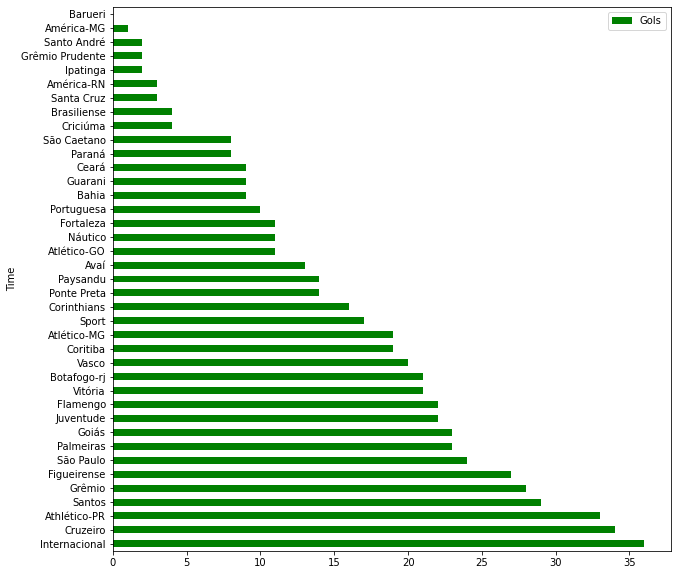

In [74]:
ax = gols_fluminense.plot.barh(x='Time', y='Gols',color ='green',figsize=(10,10))

## 7.0 - Evolução da classificação

### Posição final do Fluminense durante os 10 anos

In [76]:
# Função que cria lista dos dataframes de cada ano
def listar_df(dataframe):
    new_df = dataframe.copy()  # Copia o dataframe input
    anos = new_df['Ano'].unique() # Vai criar uma array com cada ano que aparece na coluna
    anos = anos.tolist()    # Transforma a array em uma lista
    
    # Filtrar dataframes
    dbs = []
    for ano in anos:  # Vai pegar os anos na lista e usar como critério para filtrar os dataframes
        db = new_df.loc[new_df['Ano'] == ano]
        dbs.append(db)
       
    return dbs

def conseguir_times(dataframe):
    # Registrar times
    df = dataframe.copy()
    times = df['Mandante'].unique()
    times = times.tolist()
    return times
    
# Função que conta o número de vitórias
def contar_vitórias(dataframe,lista):
    vitorias_time = []
    for item in lista:
        filter = dataframe["Vencedor"] == item
        vitorias = dataframe[filter]['Vencedor'].count().astype(np.int64)
        vitorias_time += [vitorias,]                                                        
    return vitorias_time

# Função que conta o número de empates
def contar_empates(dataframe, lista ):
    empates_time = []
    for item in lista:
        df = dataframe.copy()
        filter1 = (df["Mandante"] == item) | (df["Visitante"] == item)
        filter2 = df["Vencedor"] == 'Empate'
        df = df[(filter1) & (filter2)]
        empates = df['Vencedor'].count().astype(np.int64)
        empates_time += [empates,] 
    return empates_time

# Função que conta o número de derrotas
def contar_derrotas(dataframe, lista):
    derrotas_time = []
    for item in lista:
        df = dataframe.copy()
        filter1 = (df["Mandante"] == item) | (df["Visitante"] == item)
        filter2 = (df["Vencedor"] != item) & (df["Vencedor"] != 'Empate')
        df = df[(filter1) & (filter2)]
        derrotas = df['Vencedor'].count().astype(np.int64)
        derrotas_time += [derrotas,] 
    return derrotas_time

# Função para contar gols
def contar_gp(dataframe, lista):
    gp_time = [] # Gols marcados
    for item in lista:
        df = dataframe.copy()
        # Somar gols marcados em casa
        filter1 = (df["Mandante"] == item)
        df1 = df[(filter1)]
        gp1 = df1['Mandante Gols'].sum().astype(np.int64)
        # Somar gols marcados fora
        filter2 = (df["Visitante"] == item)
        df2 = df[(filter2)]
        gp2 = df2['Visitante Gols'].sum().astype(np.int64)
        gp = gp1 + gp2
        # Somar gols
        gp_time += [gp,]

    return gp_time

def contar_gc(dataframe, lista):
    gc_time = [] # Gols sofridos
    for item in lista:
        df = dataframe.copy()
        # Somar gols sofridos em casa
        filter3 = (df["Mandante"] == item)
        df3 = df[(filter3)]
        gc1 = df3['Visitante Gols'].sum().astype(np.int64)
        # Somar gols sofridos fora
        filter4 = (df["Visitante"] == item)
        df4 = df[(filter4)]
        gc2 = df4['Mandante Gols'].sum().astype(np.int64)
        gc = gc1 + gc2
        # Somar gols
        gc_time += [gc,]
        
    return gc_time

# Criar lista com nossos dataframes
dataframes = listar_df(dados)

# Loop final
tabelas = []
for dataframe in dataframes:
    times = conseguir_times(dataframe)
    vitorias = contar_vitórias(dataframe,times)
    empates = contar_empates(dataframe,times)
    derrotas = contar_derrotas(dataframe,times)
    gp = contar_gp(dataframe,times)
    gc = contar_gc(dataframe,times)
    
    # Transformar listas em um dataframe
    tabela = pd.DataFrame(list(zip(times,vitorias,empates,derrotas,gp,gc)), 
               columns =['times','vitorias','empates','derrotas','GP','GC']) 
    #Criar coluna de pontos e de saldo de gol
    tabela['Pts'] = 3*tabela['vitorias'] + tabela['empates']
    tabela['SG'] = tabela['GP'] + tabela['GC']
    # Ordenar os times
    tabela = tabela.sort_values(['Pts', 'vitorias', 'SG','GP'], ascending=[False, False, False,False])
    # Criar coluna com posição
    posição = len(tabela) + 1
    tabela['Posição'] = [i for i in range(1,posição)]
    # Ajustar ordem das colunas
    tabela = tabela[['times','Pts','vitorias','empates','derrotas','GP','GC','SG','Posição']]
    
    tabelas.append(tabela)
    
# Obter a classificação do Fluminense ao longo dos anos
flu = []
for tabela in tabelas:
    for index,row in tabela.iterrows():
        if row['times'] == 'Fluminense':
            pos = row['Posição']
    flu.append(pos)

def conseguir_ano(dataframe):
    new_df = dataframe.copy()  # Copia o dataframe input
    anos = new_df['Ano'].unique() # Vai criar uma array com cada ano que aparece na coluna
    anos = anos.tolist()    # Transforma a array em uma lista
    return anos

ano = conseguir_ano(df)

campeões = pd.DataFrame(list(zip(ano,flu)),columns =['Ano','Classificação'])

campeões.head(17)


,Ano,Classificação
0,2003,20
1,2004,10
2,2005,5
3,2006,15
4,2007,5
5,2008,14
6,2009,16
7,2010,1
8,2011,3
9,2012,1


## 8.0 - Conclusão

In [77]:
# Vitórias
vitorias = resultado['Vit'].sum()
print('O Fluminense venceu '+str(vitorias) + ' jogos.')

# Derrotas
derrotas = resultado['Der'].sum()
print('O Fluminense perdeu '+str(derrotas) + ' jogos.')

# Empates
empates = resultado['Emp'].sum()
print('O Fluminense empatou '+str(empates) + ' jogos.')

# Gols Marcados
print('O Fluminense marcou '+str(gols) + ' gols.')

# Gols por partida
print('O Fluminense marcou '+str(round(gols_partida,1)) + ' gols por partida.')

# Aproveitamento de pontos
pontos = 3*vitorias+empates
aproveitamento = pontos/(3*(vitorias+derrotas+empates))
print('O Fluminense teve aproveitamento de '+str(100*round(aproveitamento,1)) + '%.')

O Fluminense venceu 161 jogos.
O Fluminense perdeu 129 jogos.
O Fluminense empatou 110 jogos.
O Fluminense marcou 582 gols.
O Fluminense marcou 1.5 gols por partida.
O Fluminense teve aproveitamento de 50.0%.
